# Car Price Prediction
#### Problem Statement

Automobile company aspires to enter the US market.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market.

#### Goal:
User Linear Regression to Draw Inference to determine factors that would lead to their successful enterance to the American Market

#### Data Source:

Kaggle: https://www.kaggle.com/goyalshalini93/car-data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Overview

Basic understanding and overview of Data

In [3]:
cars_data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
cars_data.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
cars_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
cars_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
# car models
car_names = cars_data['CarName'].unique()

In [8]:
#dataset does not include company column, but can be created from car Name column
def carCompany(data):
    return data.split(' ')[0]

In [9]:
cars_data['Car_Company'] = cars_data['CarName'].apply(carCompany)

In [10]:
cars_data['Car_Company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Car_Company, Length: 205, dtype: object

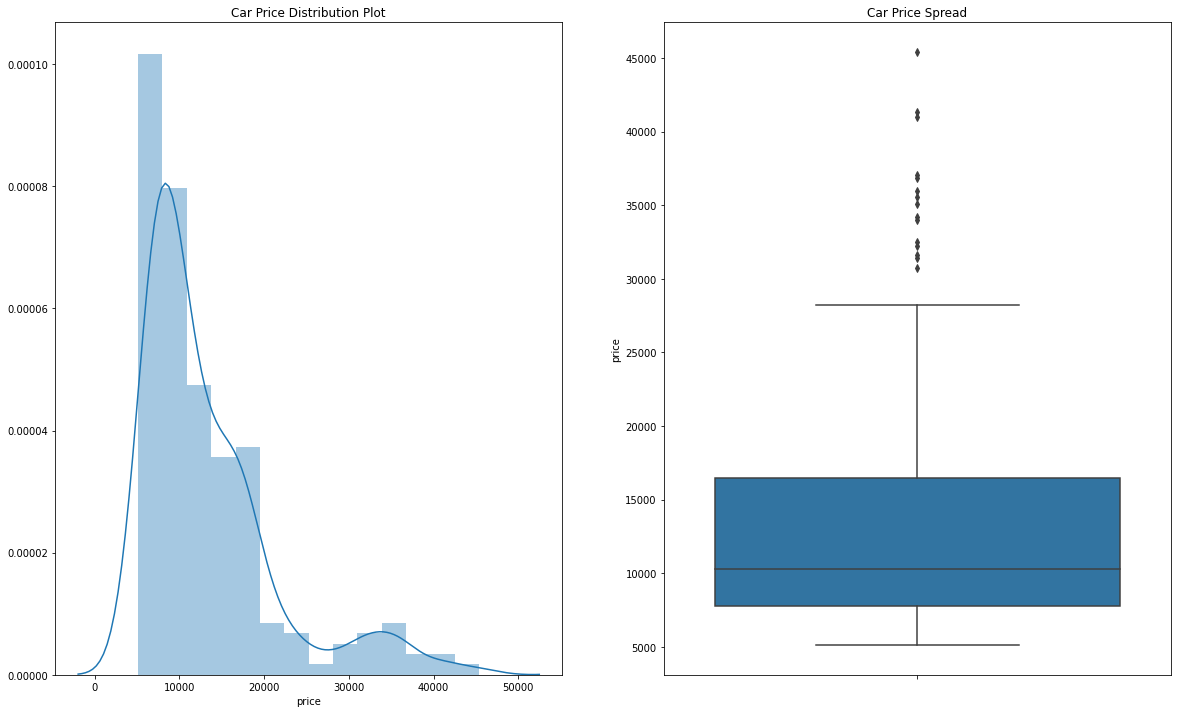

In [11]:
# Take a look at the price Distribution
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars_data['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_data['price'])

plt.show()

In [12]:
# Clear skew of the data, cars mostly sold at the 8k - 15k distribution, i.e most cars are low priced
#significant difference between mean and median price

#Analyze categorical Variables
cars_data['Car_Company'].unique()
#can see that some data clean up is required, few duplicates

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
def duplicate_replace(company):
    company_match = {'maxda':'mazda',
    'nissan': 'Nissan',
    'porcshce':"porsche",
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'}
    return company if company_match.get(company) == None else company_match.get(company)

In [14]:
cars_data['Car_Company'] = cars_data['Car_Company'].apply(duplicate_replace)

In [15]:
cars_data['Car_Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Categorical Analysis

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

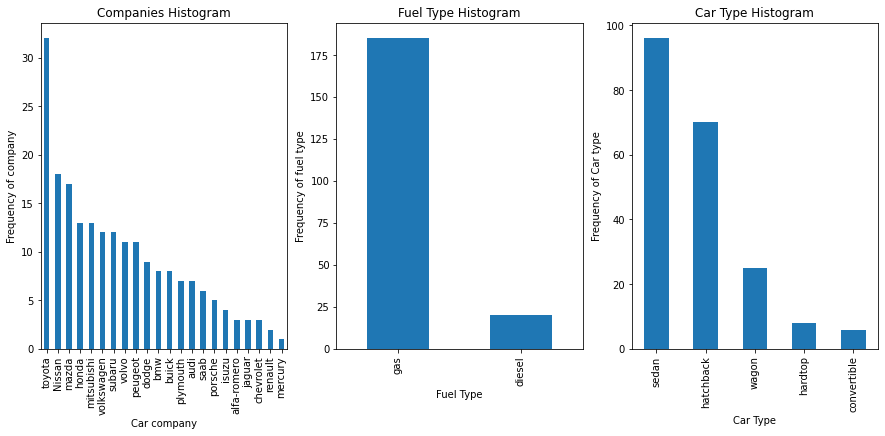

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = cars_data['Car_Company'].value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars_data['fueltype'].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars_data['carbody'].value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

## Inference:

##### Toyta seems to be the most popular company followed Nissan and Mazda
#### Customers overwhelmlingly prefer Gas cars
#### Most cars purchased are sedan followed by Hatchbacks

In [17]:

# CompanyName
# Symboling
# fueltype
# enginetype
# carbody
# doornumber
# enginelocation
# fuelsystem
# cylindernumber
# aspiration
# drivewheel


[Text(0, 0.5, 'Frequency of drive wheel'), Text(0.5, 0, 'drive wheel')]

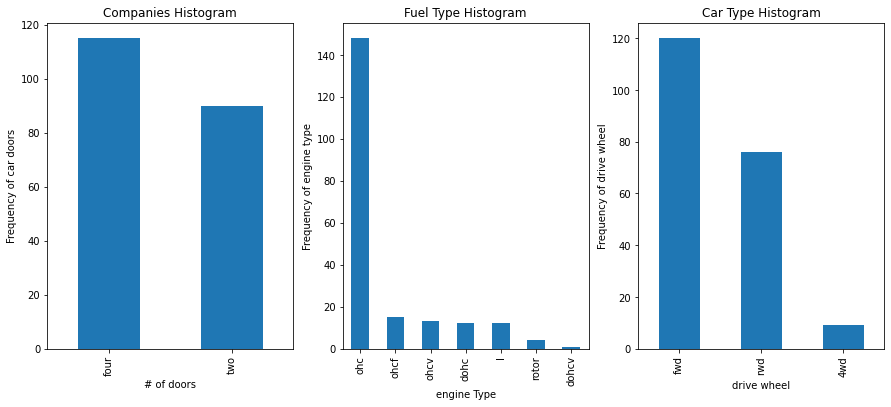

In [18]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt1 = cars_data['doornumber'].value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = '# of doors', ylabel='Frequency of car doors')

plt.subplot(1,3,2)
plt1 = cars_data['enginetype'].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'engine Type', ylabel='Frequency of engine type')

plt.subplot(1,3,3)
plt1 = cars_data['drivewheel'].value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'drive wheel', ylabel='Frequency of drive wheel')

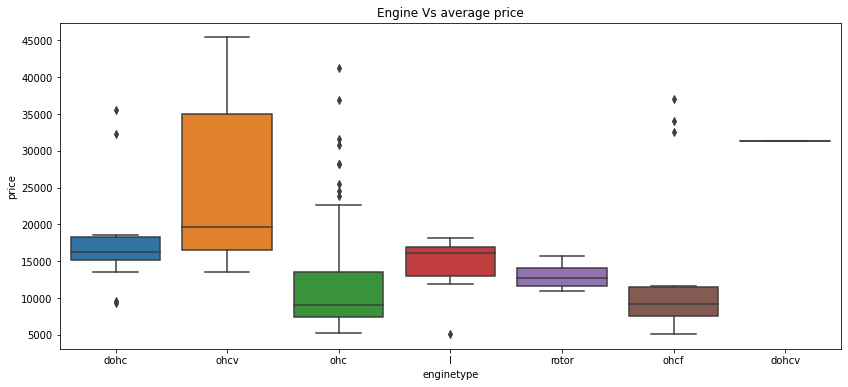

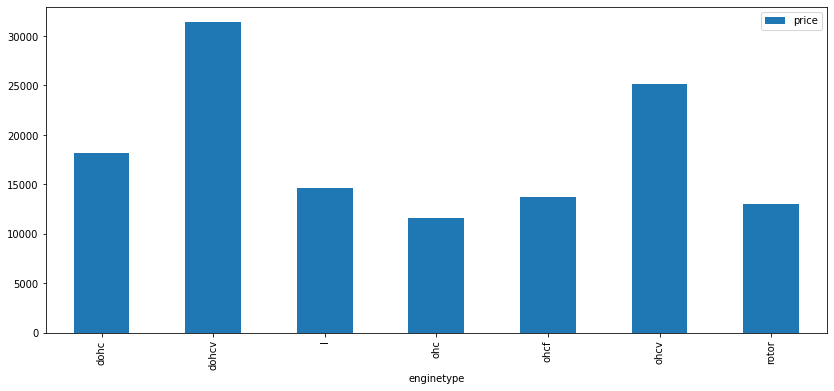

In [19]:
# check type DHC most popular engine type
plt.figure(figsize=(14,6))
plt.title('Engine type vs price Box plot')
sns.boxplot(x=cars_data['enginetype'], y=cars_data['price'])

plt.title('Engine Vs average price')
df = pd.DataFrame(cars_data.groupby('enginetype')['price'].mean())
df.plot.bar(figsize=(14,6))
plt.show()

## inference:

#### OHC is engine type is by far the most popular engine type 
#### mean price of OHC engine is lowest
#### OHC engine type tends to be found in least expense cars and moderatly expense cars, 75% of cars #### with OHC engine cost between 7000 - 14000
#### DOHCV engine seems to have most expense cars and average price of car is above $30000

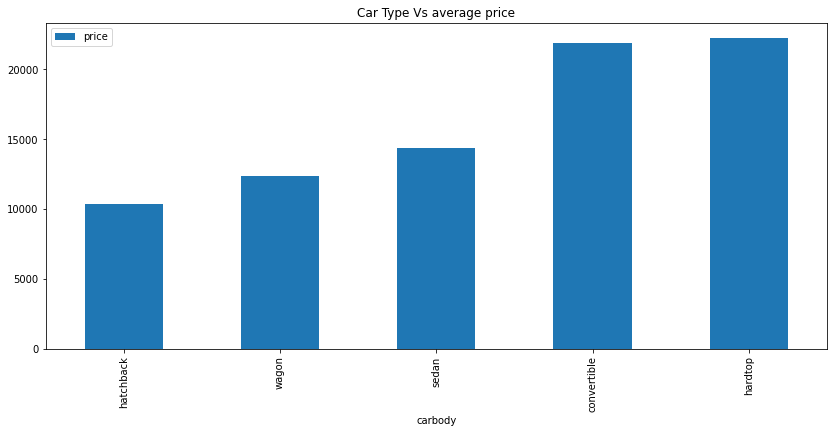

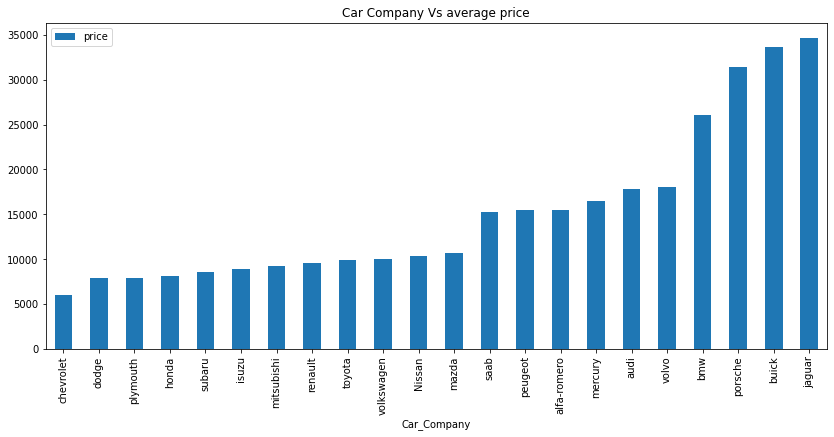

In [20]:
# checking average price across company and car type
#plt.figure(figsize=(14, 6))


df2 = pd.DataFrame(cars_data.groupby('carbody')['price'].mean().sort_values())
df2.plot.bar(figsize=(14, 6))
plt.title('Car Type Vs average price')
plt.show()


df3 = pd.DataFrame(cars_data.groupby('Car_Company')['price'].mean().sort_values())
df3.plot.bar(figsize=(14, 6))
plt.title('Car Company Vs average price')
plt.show()

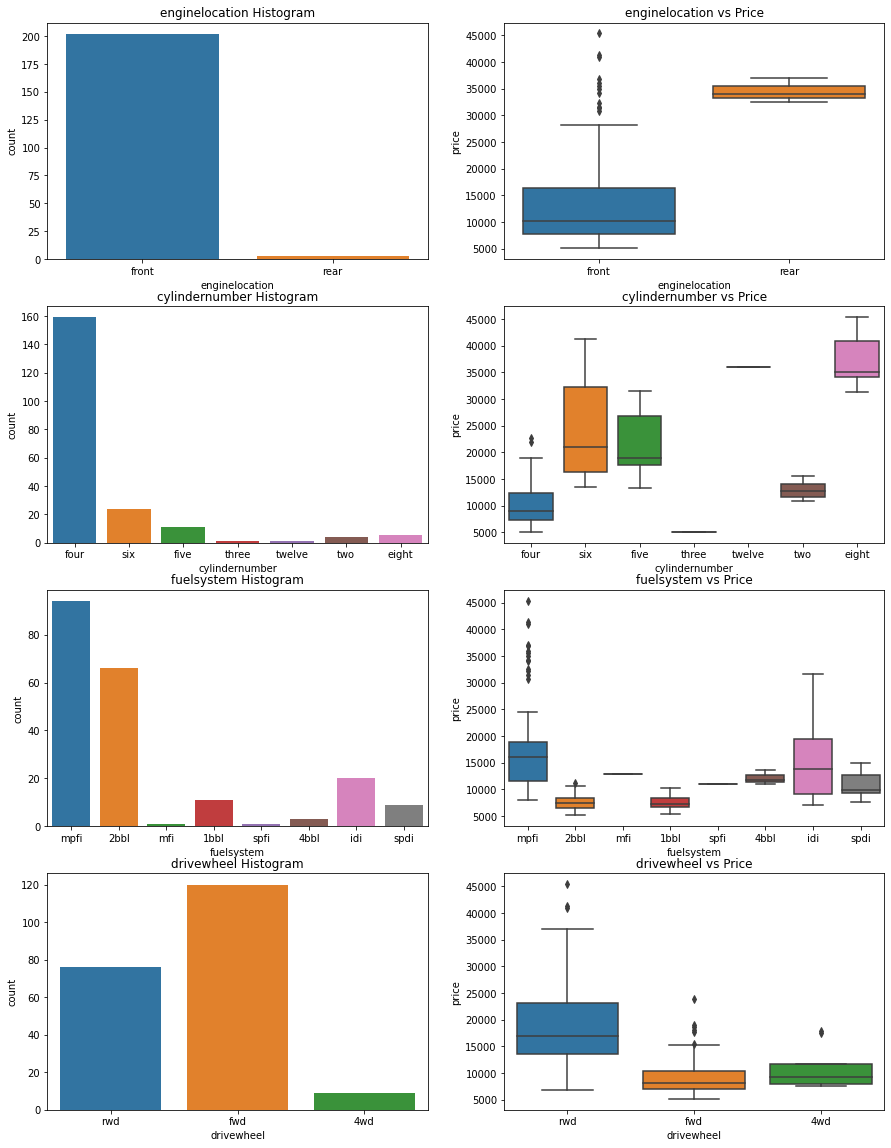

In [21]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars_data[x])
    plt.subplot(4,2,fig+1)
    plt.title(x+' vs Price')
    sns.boxplot(x=cars_data[x], y=cars_data['price'])
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

## Analyzing Numerical data

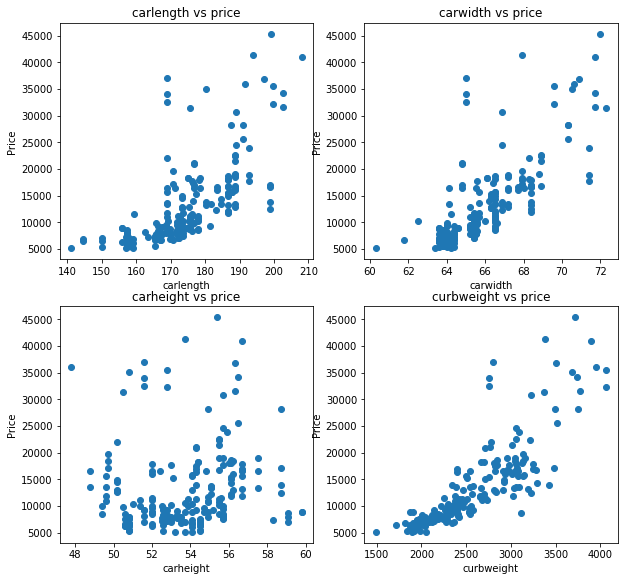

In [22]:
#comparing against car price
def scatter_plot(x, fig):
    plt.subplot(4,2,fig)
    plt.scatter(cars_data[x], cars_data['price'])
    plt.title(x+' vs price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
plt.figure(figsize=(10, 20))

scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)


In [23]:
num_columns = ['wheelbase', 'carlength','carwidth','carheight','curbweight','boreratio','stroke','horsepower','peakrpm','citympg','highwaympg','price']

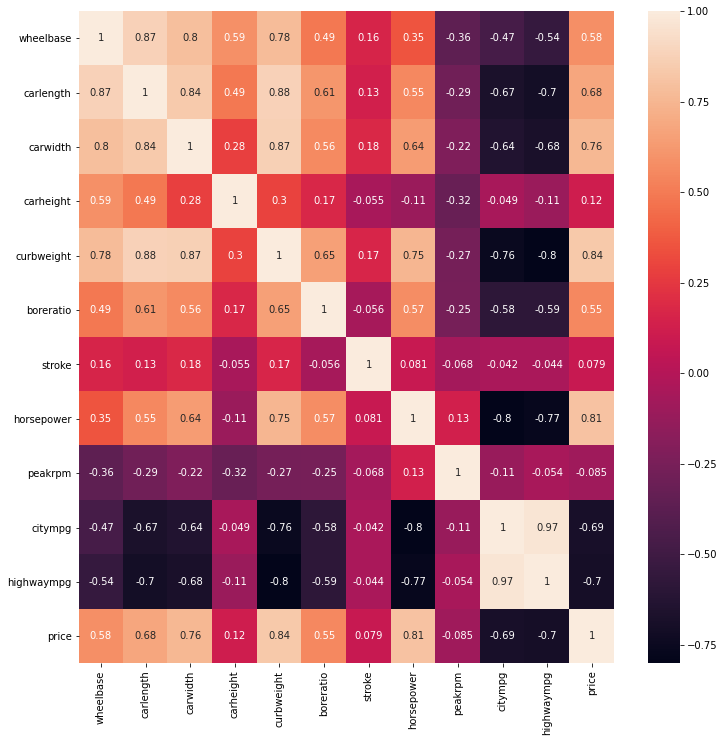

In [24]:
plt.figure(figsize=(12, 12))
sns.heatmap(cars_data[num_columns].corr(), annot = True)

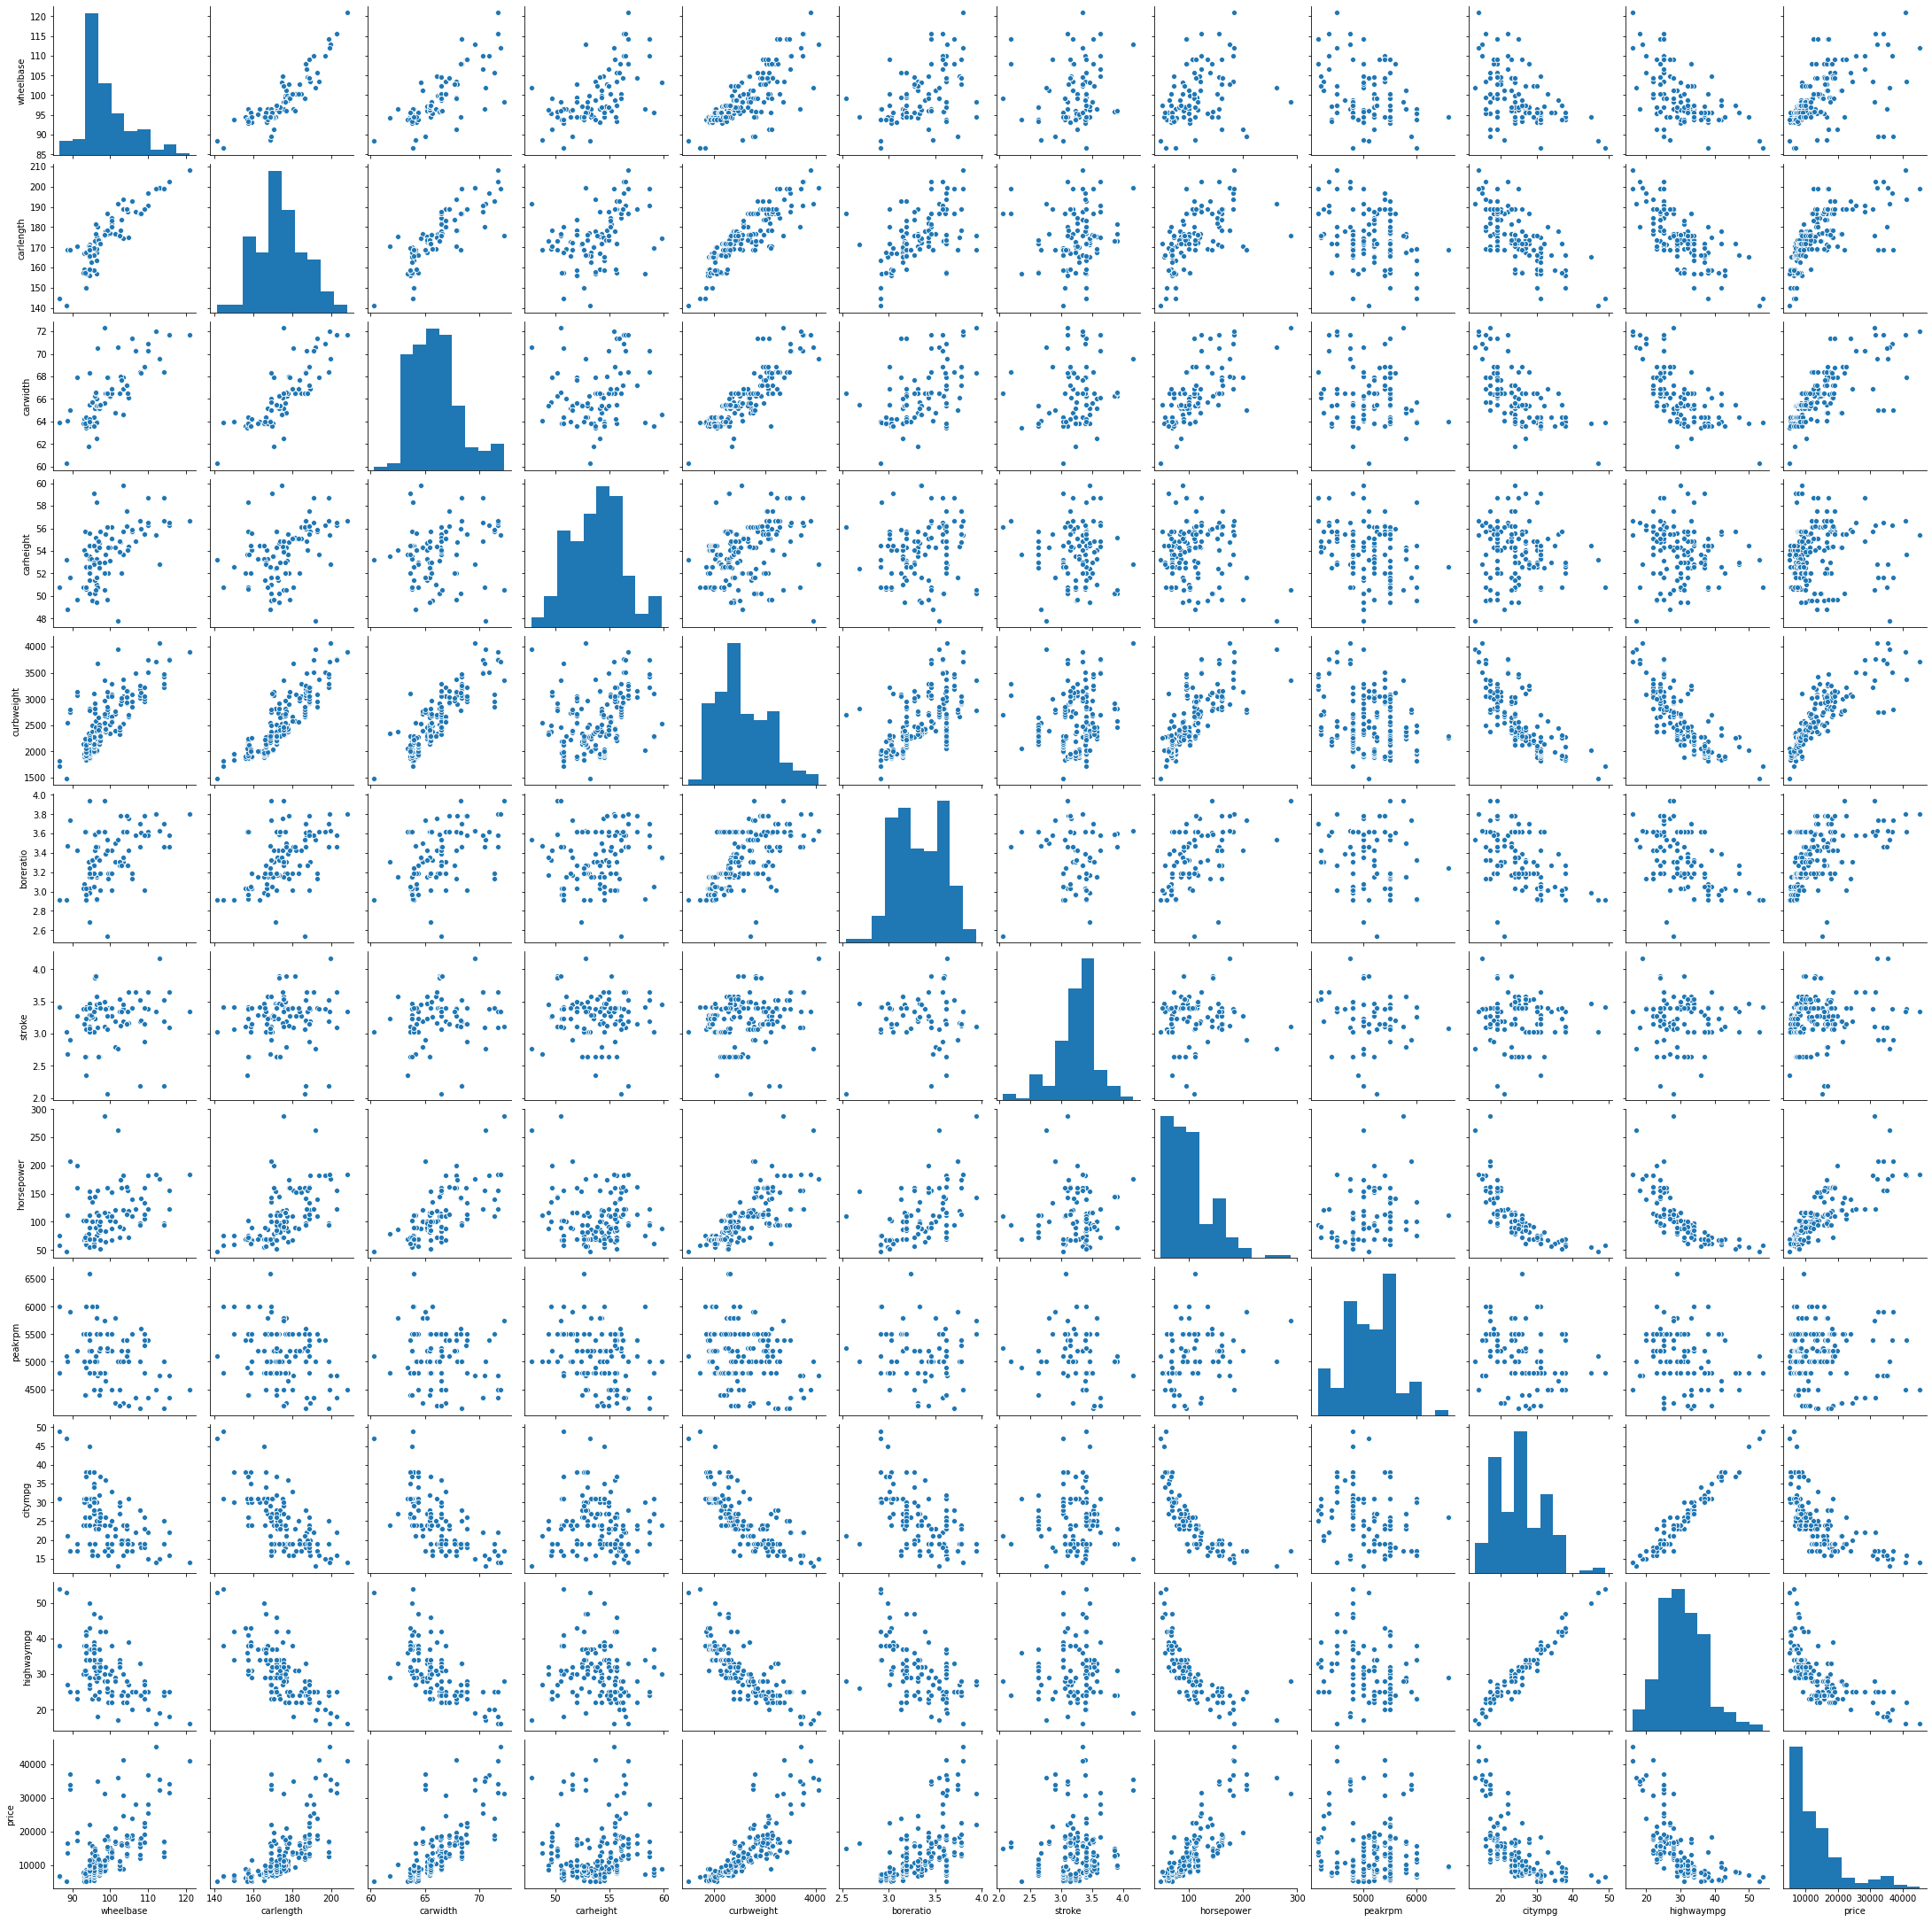

In [25]:
sns.pairplot(cars_data[num_columns])

In [26]:
cars_data[num_columns].corr()['price'].sort_values()

highwaympg   -0.697599
citympg      -0.685751
peakrpm      -0.085267
stroke        0.079443
carheight     0.119336
boreratio     0.553173
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
horsepower    0.808139
curbweight    0.835305
price         1.000000
Name: price, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


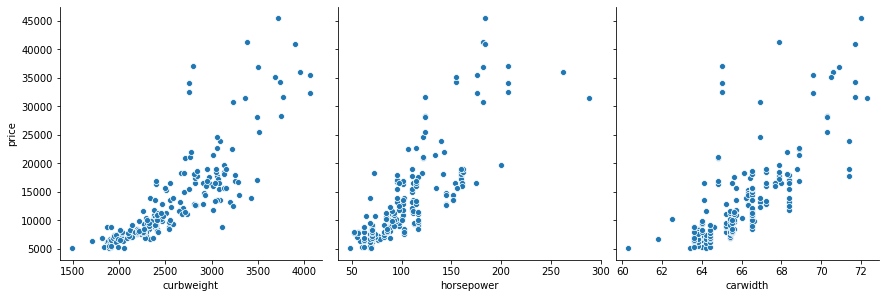

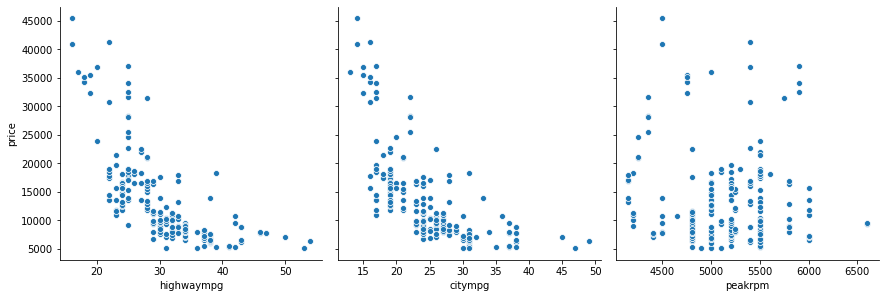

In [27]:
def cus_pair_plot(c1,c2,c3):
    sns.pairplot(cars_data, x_vars=[c1,c2,c3], y_vars='price', size=4, aspect=1, kind='scatter')
    plt.show()

cus_pair_plot('curbweight','horsepower','carwidth')
cus_pair_plot('highwaympg','citympg','peakrpm')

## Inference:

#### 1. 'curbweight','horsepower','carwidth' have highest positive correlation with price
#### 2. 'highwaympg','citympg', have negative correlation with price

## Bivariate Analysis

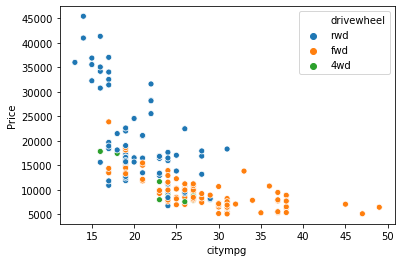

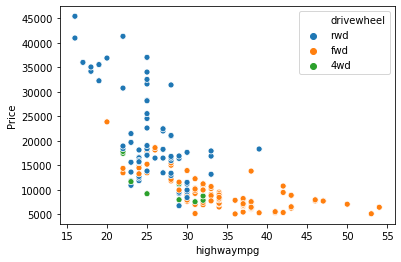

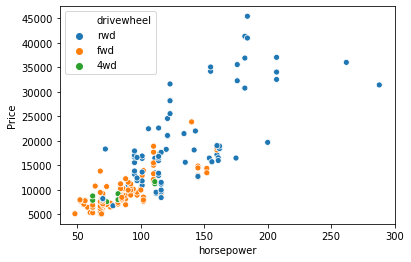

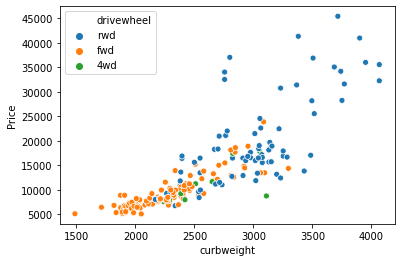

In [28]:
def cus_comparison(title, x, hue):
    sns.scatterplot(x=cars_data[x], y=cars_data['price'], hue=cars_data[hue])
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.show()
    
cus_comparison('city mpg vs price','citympg','drivewheel')
cus_comparison('highway mpg vs price','highwaympg','drivewheel')
cus_comparison('horsepower mpg vs price', 'horsepower','drivewheel')
cus_comparison('curbeweight mpg vs price','curbweight','drivewheel')

## list of Most important features:
- Engine Type 
- Fuel type 
- Car Body 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Horse Power 
- Wheel base 
- Fuel Economy
- highwaympg
- citympg

In [29]:
cars_data_updated = cars_data[['price', 'fueltype','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize','horsepower', 'carlength','carwidth', 'highwaympg', 'citympg']]

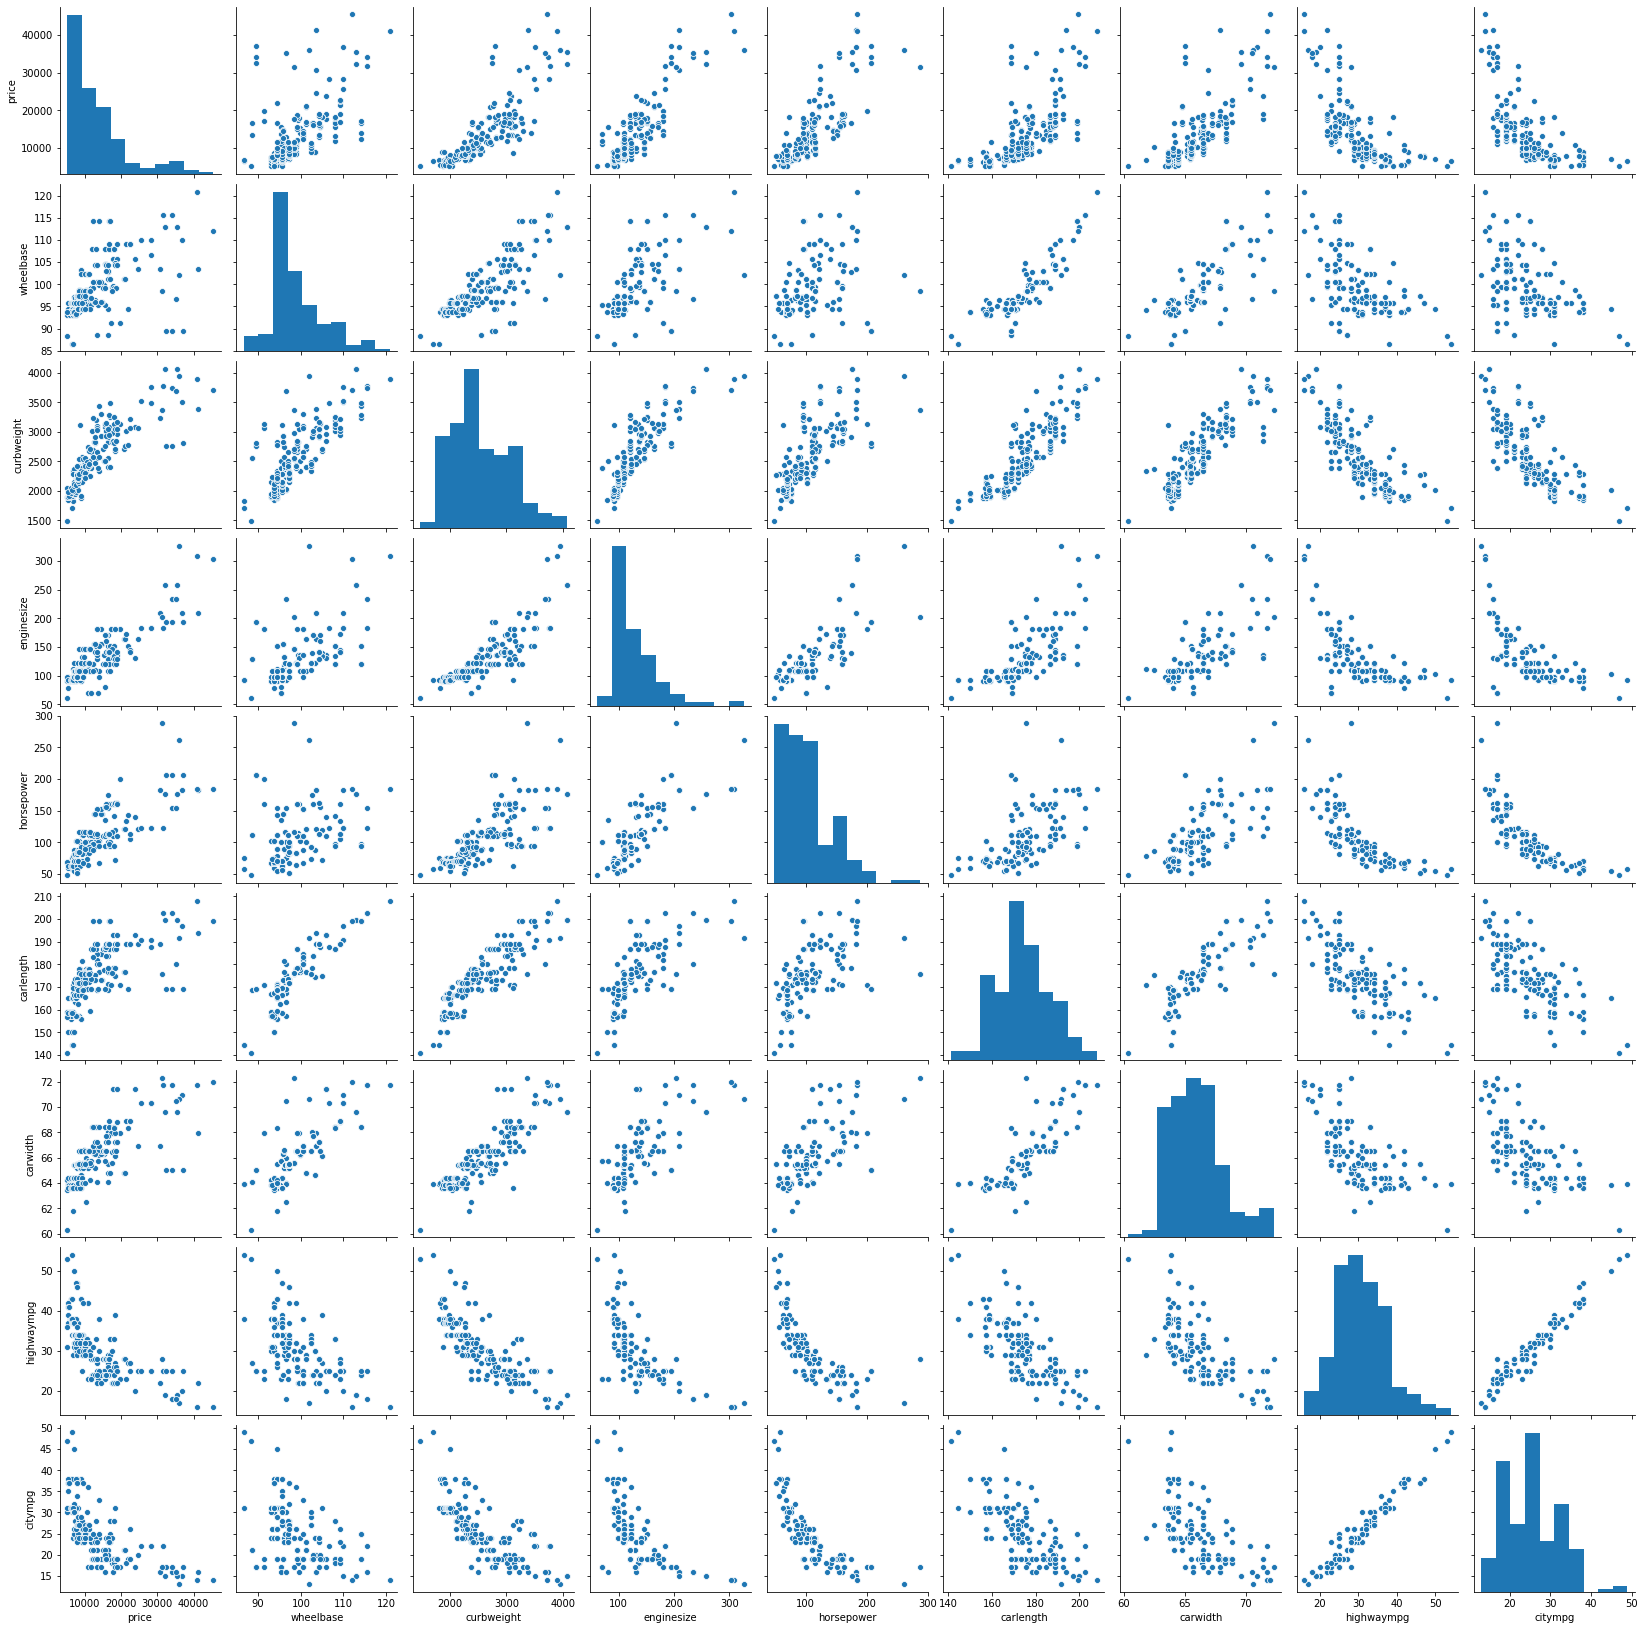

In [30]:
sns.pairplot(cars_data_updated)
plt.show()

In [31]:
cars_data_updated.head()

,price,fueltype,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,horsepower,carlength,carwidth,highwaympg,citympg
0,13495.0,gas,convertible,rwd,88.6,2548,dohc,four,130,111,168.8,64.1,27,21
1,16500.0,gas,convertible,rwd,88.6,2548,dohc,four,130,111,168.8,64.1,27,21
2,16500.0,gas,hatchback,rwd,94.5,2823,ohcv,six,152,154,171.2,65.5,26,19
3,13950.0,gas,sedan,fwd,99.8,2337,ohc,four,109,102,176.6,66.2,30,24
4,17450.0,gas,sedan,4wd,99.4,2824,ohc,five,136,115,176.6,66.4,22,18


In [32]:
# adjusting categorical data into indicator variables for ML model
def categorical_data(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace = True)
    return df

In [33]:
cars_data_updated = categorical_data('fueltype', cars_data_updated)
cars_data_updated = categorical_data('carbody', cars_data_updated)
cars_data_updated = categorical_data('drivewheel', cars_data_updated)
cars_data_updated = categorical_data('enginetype', cars_data_updated)
cars_data_updated = categorical_data('cylindernumber', cars_data_updated)

In [34]:
cars_data_updated.head()
cars_lm = cars_data_updated

In [35]:
cars_lm

,price,wheelbase,curbweight,enginesize,horsepower,carlength,carwidth,highwaympg,citympg,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,111,168.8,64.1,27,21,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,111,168.8,64.1,27,21,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,154,171.2,65.5,26,19,1,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,102,176.6,66.2,30,24,1,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,115,176.6,66.4,22,18,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,114,188.8,68.9,28,23,1,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,3049,141,160,188.8,68.8,25,19,1,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,3012,173,134,188.8,68.9,23,18,1,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,3217,145,106,188.8,68.9,27,26,0,...,1,0,0,0,0,0,1,0,0,0


In [36]:
#Train/test data split
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cars_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
#scaling numerical data values
from sklearn.preprocessing import MinMaxScaler

scaler_init = MinMaxScaler()
num_features = ['price','wheelbase','curbweight', 'enginesize','horsepower', 'carlength','carwidth', 'highwaympg', 'citympg']
df_train[num_features] = scaler_init.fit_transform(df_train[num_features])

<ipython-input-37-65de5eb7b438>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_features] = scaler_init.fit_transform(df_train[num_features])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
df_train.head()

,price,wheelbase,curbweight,enginesize,horsepower,carlength,carwidth,highwaympg,citympg,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.083333,0.426016,0.291667,0.567568,0.500000,1,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,0.395833,0.452033,0.666667,0.270270,0.166667,1,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.266667,0.448780,0.308333,0.324324,0.361111,1,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.262500,0.450407,0.316667,0.270270,0.222222,1,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.475000,0.775610,0.575000,0.135135,0.111111,1,...,1,0,0,0,0,1,0,0,0,0


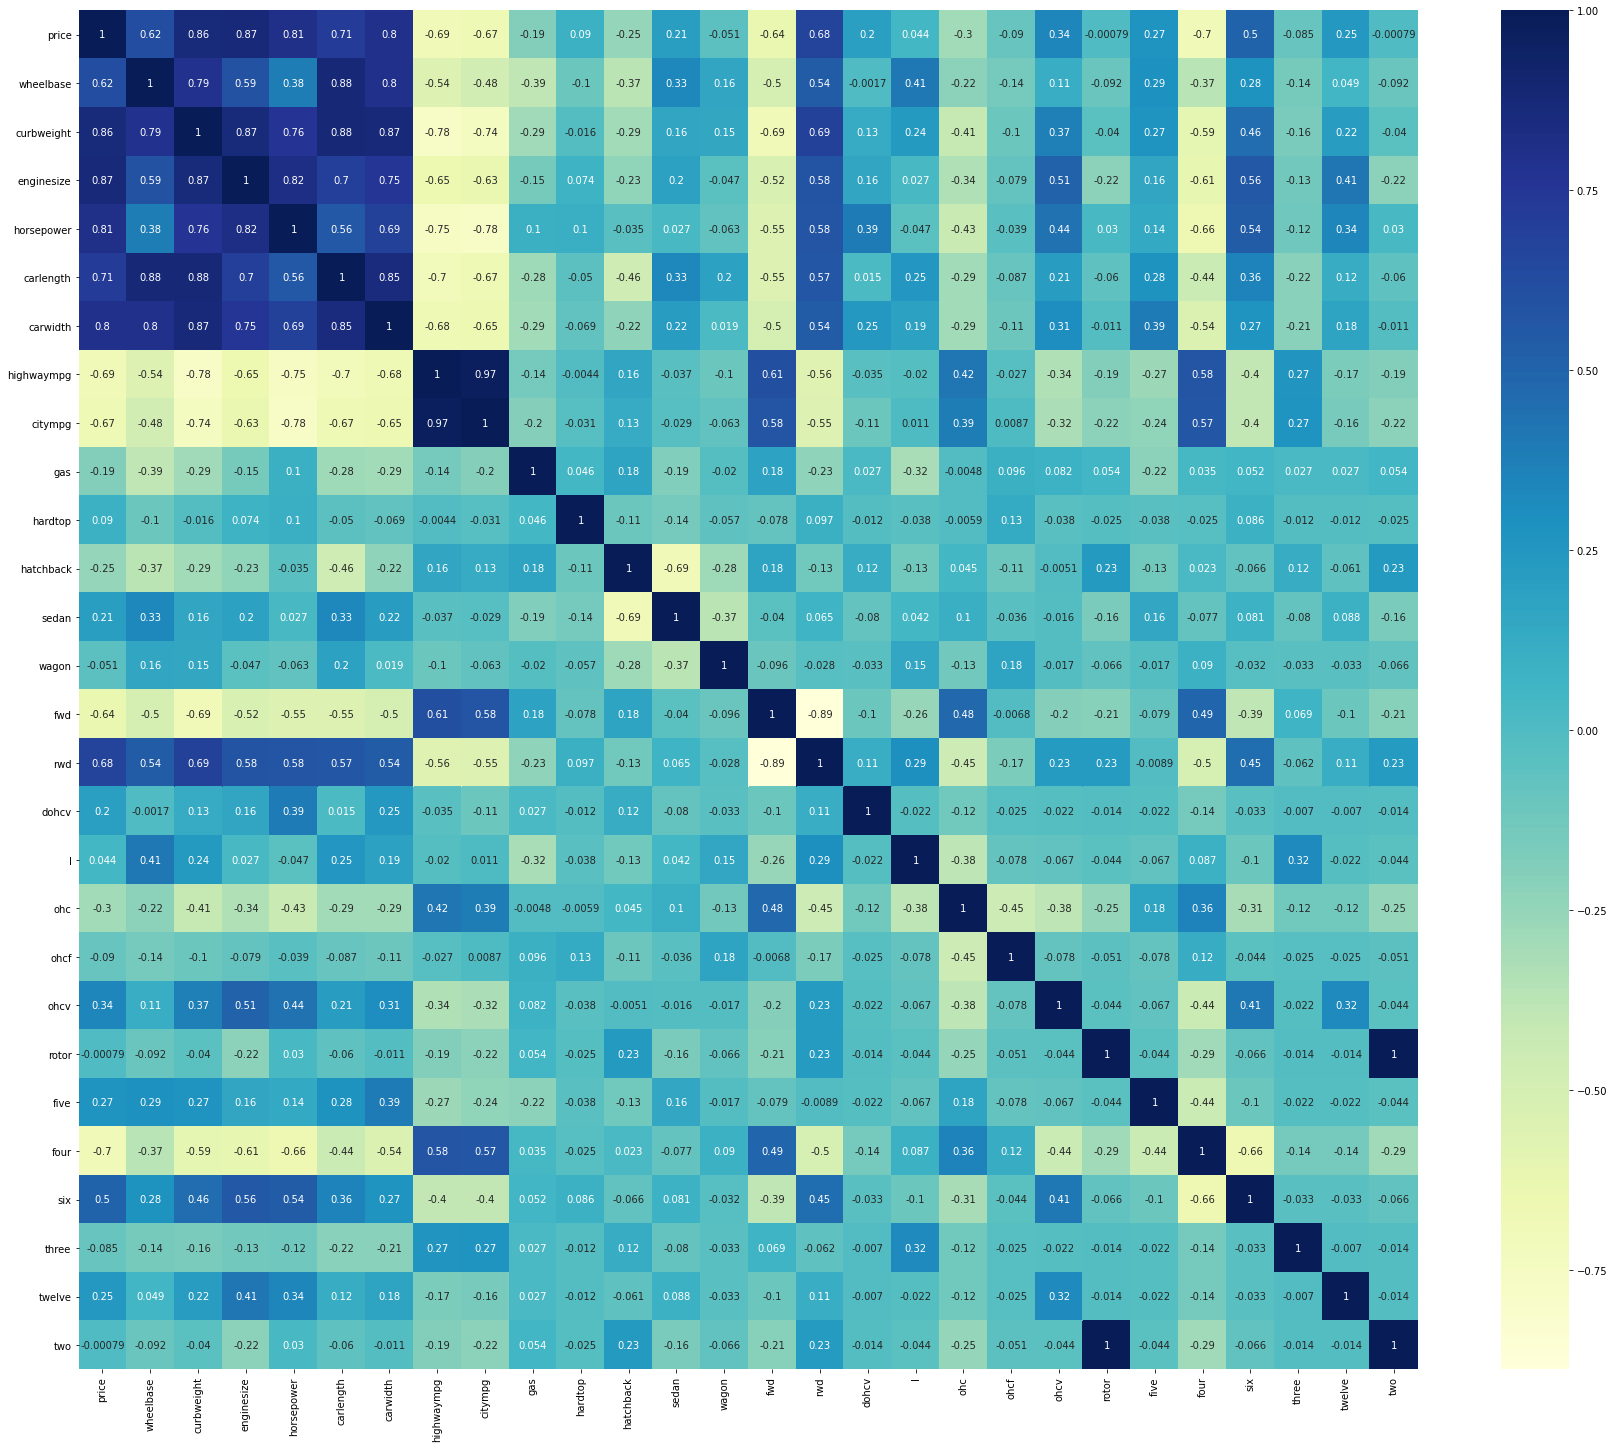

In [39]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building the Model and statistical Analysis

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#x,y variable and fitting model
x_train = df_train
y_train = df_train.pop('price')
lm = LinearRegression()
lm.fit(x_train, y_train)

#using RFE in a training dataset to select features that are most relevant in predicting the target variable.
rfe = RFE(lm, 10)
rfe.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [43]:
#checking the ranking of most important feature from RFE:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('horsepower', True, 1),
 ('carlength', False, 8),
 ('carwidth', False, 9),
 ('highwaympg', True, 1),
 ('citympg', False, 11),
 ('gas', False, 17),
 ('hardtop', False, 5),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 14),
 ('dohcv', False, 2),
 ('l', False, 16),
 ('ohc', False, 7),
 ('ohcf', False, 6),
 ('ohcv', False, 10),
 ('rotor', False, 15),
 ('five', False, 4),
 ('four', True, 1),
 ('six', False, 3),
 ('three', False, 12),
 ('twelve', True, 1),
 ('two', False, 13)]

In [44]:
#columns selected
x_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'highwaympg',
       'hatchback', 'sedan', 'wagon', 'four', 'twelve'],
      dtype='object')

In [45]:
#building models to get detailed statistics
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,wheelbase,curbweight,enginesize,horsepower,highwaympg,hatchback,sedan,wagon,four,twelve
122,0.244828,0.272692,0.139623,0.083333,0.567568,0,1,0,1,0
125,0.272414,0.500388,0.339623,0.395833,0.270270,1,0,0,1,0
166,0.272414,0.314973,0.139623,0.266667,0.324324,1,0,0,1,0
1,0.068966,0.411171,0.260377,0.262500,0.270270,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.475000,0.135135,0,0,1,1,0


In [46]:
def cus_build_model(x,y):
    x = sm.add_constant(x)
    lm = sm.OLS(y, x).fit()
    print(lm.summary())
    return x

## Model 1 Analysis

In [47]:
x_train_new = cus_build_model(x_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     82.00
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.19e-51
Time:                        21:50:14   Log-Likelihood:                 158.21
No. Observations:                 143   AIC:                            -294.4
Df Residuals:                     132   BIC:                            -261.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.061      0.462      0.6

#### Inference from Model 1:
- twelve,highway mpg and wheelbase have p-value > 0.05, so these can be dropped

In [48]:
x_train_new_v1 = x_train_rfe.drop(['twelve', 'highwaympg', 'wheelbase'], axis=1)

## Model v2 Analysis

In [49]:
x_train_new_v1 = cus_build_model(x_train_new_v1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           2.23e-53
Time:                        21:50:17   Log-Likelihood:                 154.91
No. Observations:                 143   AIC:                            -293.8
Df Residuals:                     135   BIC:                            -270.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.047      1.712      0.0

## Analyzing Multicollinearity to adjust for below:

1. Multicollinearity does not add to the information we gain from the predictors in our model.
2. It can inflate the variance of the predictor coefficients.
3. Using the Variance Inflation Factor to give us an idea of how multicollinearity of a predictor variable.


In [50]:
def VIF_check(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif


In [51]:
VIF_check(x_train_new_v1)

,Features,VIF
0,const,43.89
1,curbweight,5.17
2,enginesize,5.88
3,horsepower,3.87
4,hatchback,5.57
5,sedan,5.86
6,wagon,3.66
7,four,1.90


In [52]:
#dropping enginesize feature due to its high multicollinearity
x_train_new_v2 = x_train_new_v1.drop(['enginesize'], axis=1)

## Model V3 Analysis

In [53]:
x_train_new_v2 = cus_build_model(x_train_new_v2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     124.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           9.41e-53
Time:                        21:50:20   Log-Likelihood:                 150.75
No. Observations:                 143   AIC:                            -287.5
Df Residuals:                     136   BIC:                            -266.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0947      0.048      1.990      0.0

In [54]:
VIF_check(x_train_new_v2)

,Features,VIF
0,const,43.34
1,curbweight,3.17
2,horsepower,3.19
3,hatchback,5.39
4,sedan,5.80
5,wagon,3.45
6,four,1.89


In [77]:
#dropping sedan feature due to its high multicollinearity
x_train_new_v3 = x_train_new_v2.drop(['sedan'], axis=1)

In [56]:
x_train_new_v3 = cus_build_model(x_train_new_v3, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.8
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.04e-52
Time:                        21:50:22   Log-Likelihood:                 147.96
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     137   BIC:                            -266.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.035      0.512      0.6

In [57]:
VIF_check(x_train_new_v3)

,Features,VIF
0,const,22.46
1,curbweight,3.13
2,horsepower,3.09
3,hatchback,1.25
4,wagon,1.16
5,four,1.89


## Redisdual Analysis

In [58]:
lm = sm.OLS(y_train, x_train_new_v3).fit()
y_train_price = lm.predict(x_train_new_v3)

Text(0.5, 0, 'Errors')

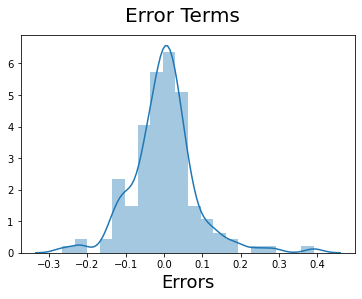

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Prediction and Evaluation

In [63]:
#scaling test data values
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'horsepower','carlength','carwidth','highwaympg','citympg','price']

In [64]:
df_test[num_vars] = scaler_init.fit_transform(df_test[num_vars])

<ipython-input-64-52f65d6440ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler_init.fit_transform(df_test[num_vars])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [65]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [67]:
#using model to make prediction
X_train_new = x_train_new_v3.drop('const',axis=1)

In [68]:
X_test_new = X_test[X_train_new.columns]

In [69]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
y_pred = lm.predict(X_test_new)

In [72]:
from sklearn.metrics import r2_score

r2_score(y_test, r_pred)

0.7634982308283613

## Evaluation of the Model

Text(0, 0.5, 'y_pred')

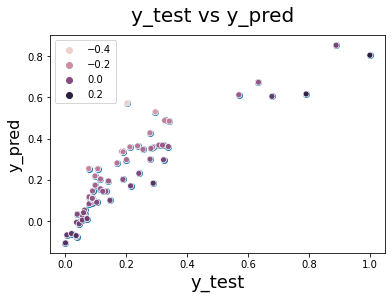

In [79]:
#plotting y_test and y_pred understand Spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
sns.scatterplot(x=y_test, y=y_pred, hue=y_test-y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [76]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.8
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.04e-52
Time:                        22:00:51   Log-Likelihood:                 147.96
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     137   BIC:                            -266.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.035      0.512      0.6

# Summary Inference of Model and Analysis

- R-sqaured and Adjusted R-squared (extent of fit) - 0.84 and 0.83 - 83% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 143.0 and 1.04e-52(approx. 0.0) - Model fit is significant and explained 84% variance is just not by chance.
- p-values: p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.